<a href="https://colab.research.google.com/github/mldurga/projects/blob/master/wagon_shipment_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Wagon shipment no scanner

[PaddleOCR](https://github.com/PaddlePaddle/PaddleOCR) models used here for reading the wagon number. 

In [4]:
!pip install paddlepaddle paddleocr -Uqq

     |████████████████████████████████| 108.4 MB 39 kB/s 
     |████████████████████████████████| 250 kB 56.5 MB/s 
     |████████████████████████████████| 603 kB 31.5 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 57 kB 5.6 MB/s 
     |████████████████████████████████| 2.7 MB 20.6 MB/s 
     |████████████████████████████████| 948 kB 33.5 MB/s 
     |████████████████████████████████| 55.7 MB 87 kB/s 
     |████████████████████████████████| 404 kB 37.4 MB/s 
     |████████████████████████████████| 127 kB 57.7 MB/s 
     |████████████████████████████████| 191 kB 43.9 MB/s 
     |████████████████████████████████| 64 kB 2.9 MB/s 
     |████████████████████████████████| 2.1 MB 55.4 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 69 kB 6.3 MB/s 
     |████████████████████████████████| 2.0 MB 25.2 MB/s 
     |████████████████████████████████| 5.6 MB 10.9 MB/s 
     |███████████████████

In [5]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
# import gradio as gr
import torch
import re

In [6]:
region={'CR', 'KR', 'NR', 'NCR', 'NER', 'NFR', 'NWR', 'ER', 'ECR', 'ECOR',
       'SR', 'SCR', 'SCOR', 'SER', 'SECR', 'SWR', 'WR', 'WCR'}
wagon={'steel_wagon':['BFNS','BOST','BOSTHS','BOXN','BRN','BRNA','BRNAHS'],'brake_van':['BVCM','BVZC','BVZI']}



In [30]:
def wagon_num():
  x=[]
  for i in range(len(num)):
    if len(num[i])!=11:
      o=i
      while o<(len(num)-1):
        if len(num[i]+num[o+1])==11:
          x.append(num[i]+num[o+1])
        o+=1
    else:x.append(num[i])
  return x 

In [41]:
ocr = PaddleOCR(use_angle_cls=True, lang='en',use_gpu=False)
img_path='/content/wag2.jpg'
result = ocr.ocr(img_path, cls=True)
outs = [line[1][0] for line in result]
txts=[item.upper() for sublist in [re.findall("[a-zA-Z]+",o) for o in outs] for item in sublist]
num=[item for sublist in [re.findall(r'\d+',o) for o in outs] for item in sublist]
rail_region=set(x if x in region else '' for x in txts)
wagon=wagon_num()
print(f'wagon number:{wagon[0] if len(wagon)>0 else None}')
print(rail_region)

[2021/12/15 13:37:37] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/15 13:37:37] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/15 13:37:37] root WARNING: version PP-OCRv2 not support cls models, auto switch to version PP-OCR
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.3.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.3.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_t

In [38]:
print(f'wagon number:{wagon[0] if len(wagon)>0 else None}')

wagon number:None


In [37]:
print(num)
print(txts)
wagon

['2', '210618', '0582']
['BOSTHSM', 'MBS', 'CARRYING', 'TARE', 'ARE', 'FITTEDWITHTWINPIPE', 'GRADUATED', 'RELEASEAIR']


[]

In [28]:
wagon=wagon_num()
wagon

['21141076037', '21141076037', '29009002038', '89009002038']

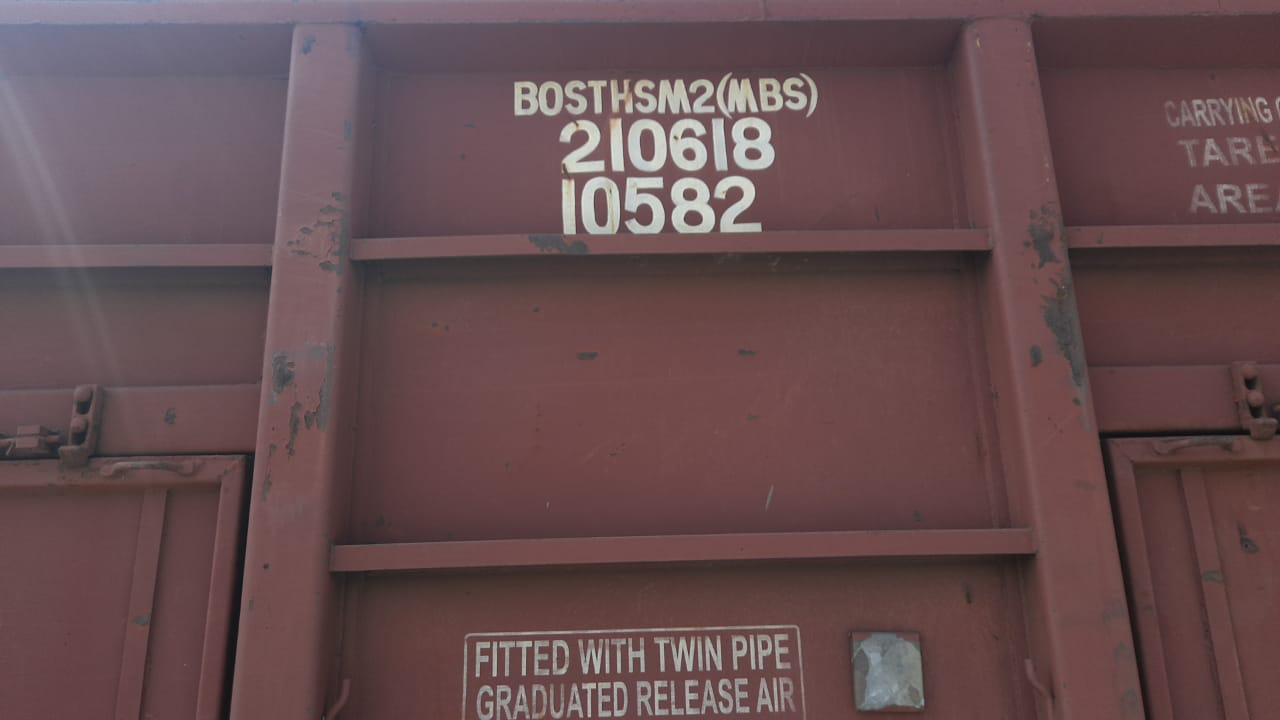

In [32]:
Image.open('/content/wag1.jpg')